In [1]:
import json
import numpy as np
import pandas as pd
import pickle

In [3]:
# 生成邻接矩阵
def make_cityflow_adj(adj_info):
    data=adj_info.copy()
    adj=np.zeros((len(data),len(data)))
    for k,v in data.items():
        adj[int(k),v+[int(k)]]=1
    pickle.dump(adj,open("./raw_data/CITYFLOW/adj_mx.pkl","wb"))
adj_info=json.load(open("./cityflow_adj/stfgnn_adj.json","r"))
make_cityflow_adj(adj_info)

In [48]:
import glob
import os
import re

# 生成车流数据
def extract_flow(fn,sp):
    flow=[]
    lines=open(fn,"r")
    for line in lines:
        flow.append(json.loads(line))
    n=int(len(flow)/180)*180
    flow=np.array([[f2[1:] for f2 in f1] for f1 in flow])[:n,...]
    flow=flow.reshape([flow.shape[0],-1])[...,np.newaxis]
    np.savez(sp,flow)

def save_flow_npz(path,save_path):
    for fn in glob.glob(path):
        name=re.search(r"_([0-9]+)\.",fn).group(1)
        sp=os.path.join(save_path,"flow"+name+".npz")
        extract_flow(fn,sp)

path="./cityflow_unilight_flow/*.json"
save_path="./raw_data/CITYFLOW/"
save_flow_npz(path,save_path)

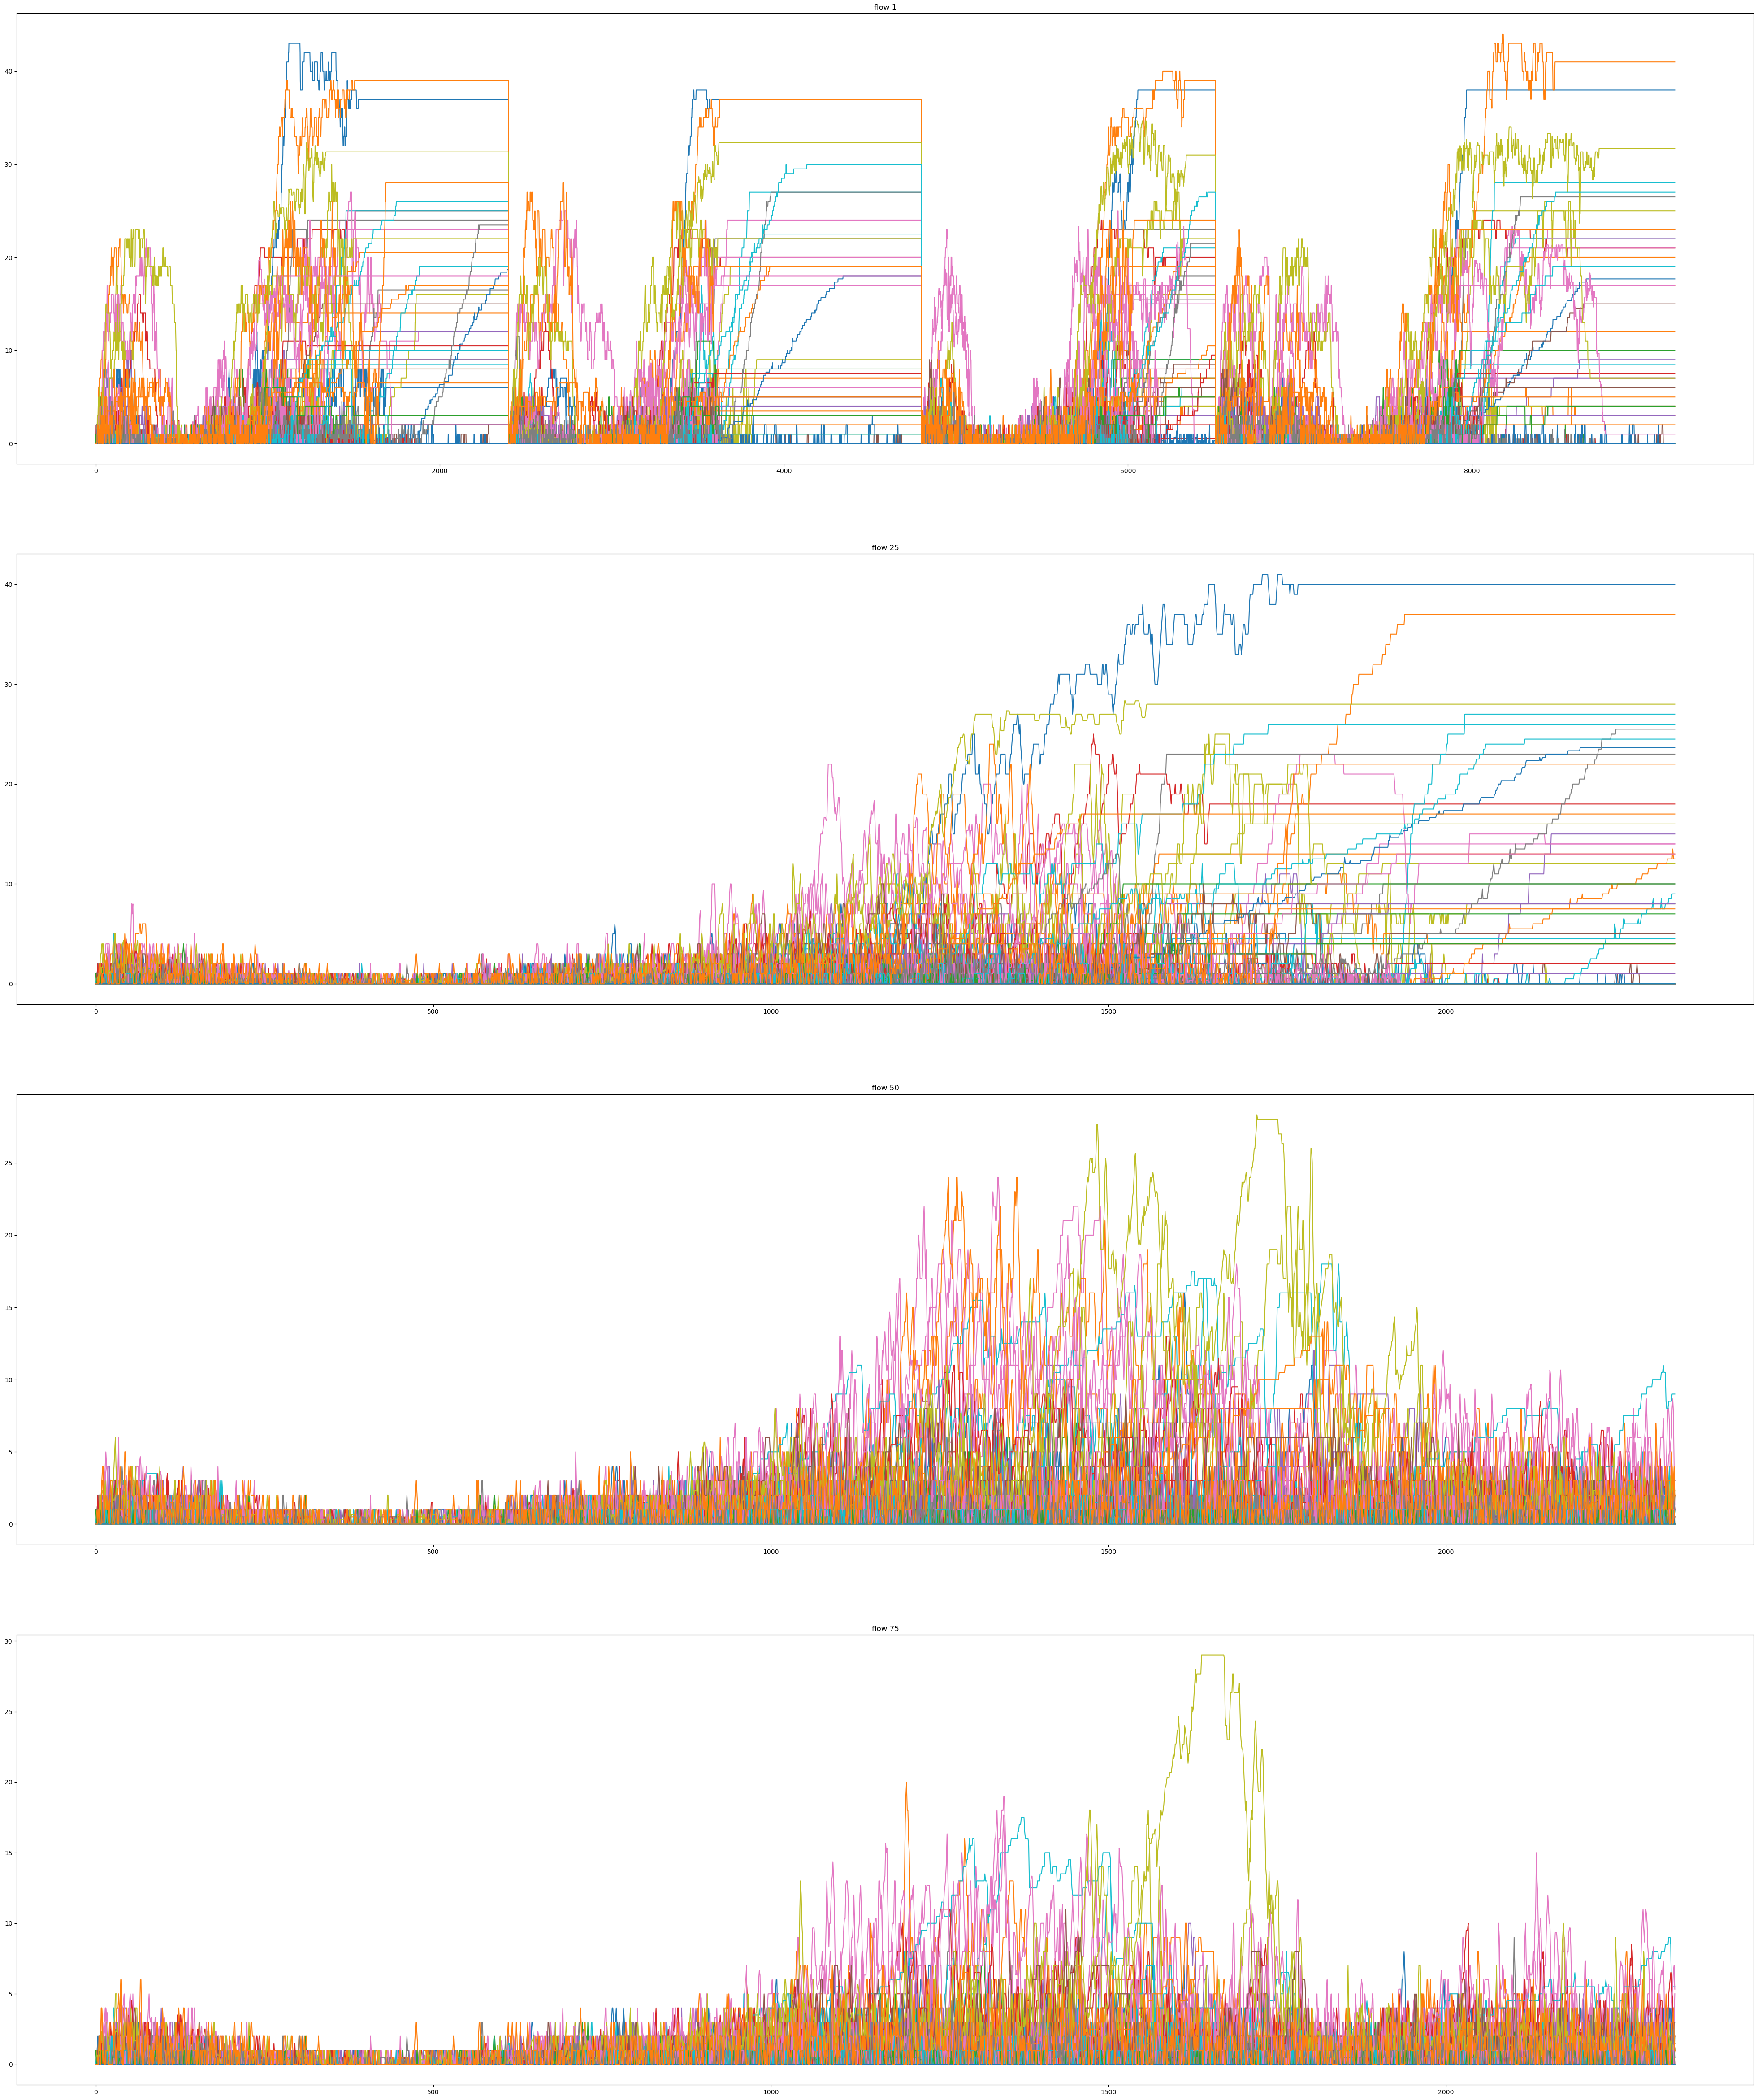

In [111]:
# 绘制1、25、50、75轮各节点的车流量
import matplotlib.pyplot as plt

plt.figure(figsize=[50,60])
flow_path="./raw_data/CITYFLOW/*.npz"
for i,file in enumerate(glob.glob(flow_path)):
    flow=np.load(file)["arr_0"][...,0]
    name=re.findall(r"\d+",file)[0]
    plt.subplot(4,1,i+1)
    for j in range(flow.shape[1]):
        # plt.plot(range(flow.shape[0]),flow[:,j])
        plt.plot(flow[:,j])
    plt.title("flow "+name)

In [36]:
# 增加相位信号，观察对流量预测有没有影响
# 1. 尝试删除归一化步骤，查看预测效果。

# 2. 首先获取每个路口的相位。

# 3. 把相位信号做成道路通行信号叠加到相位后面。

import numpy as np
import json
import glob
import os
import re


# 生成叠加相位的车流数据
def extract_flow_phase(fn,sp,phase_space):
    flow=[]
    lines=open(fn,"r")
    for line in lines:
        flow.append(json.loads(line))
    n=int(len(flow)/180)*180
    flow=np.array([[ phase_green(i,f2,phase_space) for i,f2 in enumerate(f1)] for f1 in flow])[:n,...]
    flow=flow.reshape([flow.shape[0],-1,flow.shape[-1]])
    print(flow.shape)
    np.savez(sp,flow)


def phase_green(i,f,phase_space):
    indx=phase_space[i][f[0][0]]
    green=np.zeros_like(f[1:])
    green[indx]=1
    res=np.c_[np.array(f[1:]),green]
    return res


def save_flow_phase_npz(path,save_path,phase_space):
    for fn in glob.glob(path):
        name=re.search(r"_([0-9]+)\.",fn).group(1)
        sp=os.path.join(save_path,"flow_phase"+name+".npz")
        extract_flow_phase(fn,sp,phase_space)

phase_space=json.load(open("./inter_obser_space.json","r"))
path="./cityflow_unilight_flow/*.json"
save_path="./raw_data/CITYFLOW/flow_phase/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
save_flow_phase_npz(path,save_path,phase_space)


(9180, 72, 2)
(2340, 72, 2)
(2340, 72, 2)
(2340, 72, 2)


In [49]:
tt=np.load(r"D:\77829\School\STFGNN\STFGNN-main\STFGNN-pytorch\raw_data\CITYFLOW\flow25.npz")["arr_0"]

In [50]:
tt.shape

(2340, 72, 1)